In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import MaxNLocator

## Cargado de datos

In [3]:
task_ids = ['task_1828100']
todos_los_datos = []

for task_id in task_ids:
    for generacion in range(1, 8):
        ruta_archivo = f'resultados/{task_id}/resultados_generacion_{generacion}.csv'
        if os.path.exists(ruta_archivo):
            datos = pd.read_csv(ruta_archivo)
            datos['generacion'] = generacion
            todos_los_datos.append(datos)
        else:
            print(f'Archivo no encontrado: {ruta_archivo}')

# Unir todos los DataFrames en uno solo
df_total = pd.concat(todos_los_datos, ignore_index=True)

In [4]:
df_total

,D,A,B,x,y,fitness,generacion
0,31.019499,0.000132,4.915657,433.0,628.0,0.335509,1
1,20.980961,0.000289,3.215453,446.0,494.0,0.747529,1
2,40.318745,0.000093,6.596487,443.0,559.0,0.437943,1
3,68.278160,0.000004,18.274734,425.0,566.0,0.314295,1
4,24.706751,0.000096,3.108071,448.0,621.0,0.454355,1
...,...,...,...,...,...,...,...
69995,24.756683,0.000092,11.391694,408.0,584.0,0.129336,7
69996,51.408909,0.000128,6.589871,437.0,538.0,0.557208,7
69997,46.182911,0.000025,10.784184,425.0,589.0,0.154327,7
69998,28.790066,0.000140,5.190335,406.0,585.0,0.147986,7


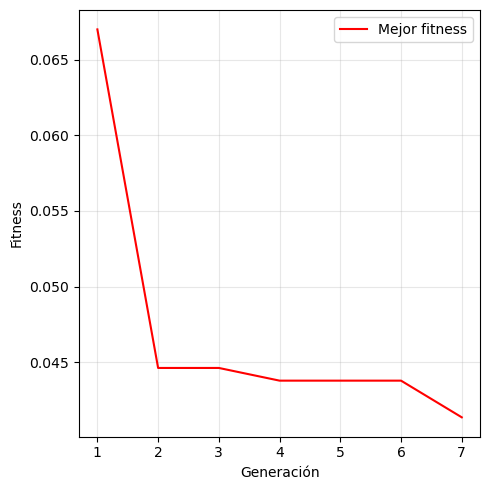

In [ ]:
# Visualizaciones de los resultados del algoritmo genético

# 1. Evolución del fitness a lo largo de las generaciones
mejor_fitness = df_total.groupby('generacion')['fitness'].min()
fitness_promedio = df_total.groupby('generacion')['fitness'].mean()

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(mejor_fitness.index, mejor_fitness.values, '-', color='red', label='Mejor fitness')
ax.plot(fitness_promedio.index, fitness_promedio.values, '-', color='blue', alpha=0.7, label='Fitness promedio')
ax.set_xlabel('Generación')
ax.set_ylabel('Fitness')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()

In [6]:
# # Ordenar por fitness (menor es mejor)
# df_sorted = df_total.sort_values("fitness", ascending=True)

# # Eliminar duplicados según las columnas que definen un individuo
# # (acá pongo todas las que listaste, podés ajustar si alguna no hace falta)
# df_unique = df_sorted.drop_duplicates(
#     subset=[
#         "D", "A", "B",
#         "beta_1", "beta_2", "beta_3", "beta_4", "beta_5",
#         "gamma_1", "gamma_2", "gamma_3", "gamma_4", "gamma_5",
#         "x", "y"
#     ],
#     keep="first"
# )

# # Quedarse con los 10 mejores
# top10 = df_unique.head(10)

# # Mostrar
# print("\n🏆 TOP 10 INDIVIDUOS ENCONTRADOS:")
# for i, row in top10.iterrows():
#     print(f"\n#{i+1}")
#     print(f"   Generación: {row['generacion']}")
#     print(f"   D = {row['D']}")
#     print(f"   A = {row['A']}")
#     print(f"   B = {row['B']}")
#     print(f"   beta_1 = {row['beta_1']}")
#     print(f"   beta_2 = {row['beta_2']}")
#     print(f"   beta_3 = {row['beta_3']}")
#     print(f"   beta_4 = {row['beta_4']}")
#     print(f"   beta_5 = {row['beta_5']}")
#     print(f"   gamma_1 = {row['gamma_1']}")
#     print(f"   gamma_2 = {row['gamma_2']}")
#     print(f"   gamma_3 = {row['gamma_3']}")
#     print(f"   gamma_4 = {row['gamma_4']}")
#     print(f"   gamma_5 = {row['gamma_5']}")
#     print(f"   Punto de ignición: ({row['x']}, {row['y']})")
#     print(f"   Fitness = {row['fitness']}")

# Ordenar por fitness (menor es mejor)
df_sorted = df_total.sort_values("fitness", ascending=True)

# Eliminar duplicados según las columnas que definen un individuo
# (acá pongo todas las que listaste, podés ajustar si alguna no hace falta)
df_unique = df_sorted.drop_duplicates(
    subset=[
        "D", "A", "B",
        "x", "y"
    ],
    keep="first"
)

# Quedarse con los 10 mejores
top10 = df_unique.head(10)

# Mostrar
print("\n🏆 TOP 10 INDIVIDUOS ENCONTRADOS:")
for i, row in top10.iterrows():
    print(f"\n#{i+1}")
    print(f"   Generación: {row['generacion']}")
    print(f"   D = {row['D']}")
    print(f"   A = {row['A']}")
    print(f"   B = {row['B']}")
    print(f"   Punto de ignición: ({row['x']}, {row['y']})")
    print(f"   Fitness = {row['fitness']}")




🏆 TOP 10 INDIVIDUOS ENCONTRADOS:

#69438
   Generación: 7.0
   D = 13.32032871246338
   A = 0.00013885764929
   B = 13.26761531829834
   Punto de ignición: (401.0, 603.0)
   Fitness = 0.0413558373741141

#30389
   Generación: 4.0
   D = 9.97393035888672
   A = 8.595664985477924e-05
   B = 17.94290542602539
   Punto de ignición: (397.0, 597.0)
   Fitness = 0.0437803058560238

#28988
   Generación: 3.0
   D = 6.5761799812316895
   A = 0.0001059908317984
   B = 15.901311874389648
   Punto de ignición: (389.0, 596.0)
   Fitness = 0.0446195449459157

#57845
   Generación: 6.0
   D = 8.824277877807617
   A = 0.0001505599211668
   B = 14.444318771362305
   Punto de ignición: (390.0, 602.0)
   Fitness = 0.0498414770607982

#20110
   Generación: 3.0
   D = 10.051328659057615
   A = 9.448259515920654e-05
   B = 12.935446739196776
   Punto de ignición: (402.0, 601.0)
   Fitness = 0.0505874673629242

#53364
   Generación: 6.0
   D = 19.49759292602539
   A = 5.5085391068132594e-05
   B = 13.703057

## Análisis de la última generación
### Análisis específico de los mejores resultados obtenidos

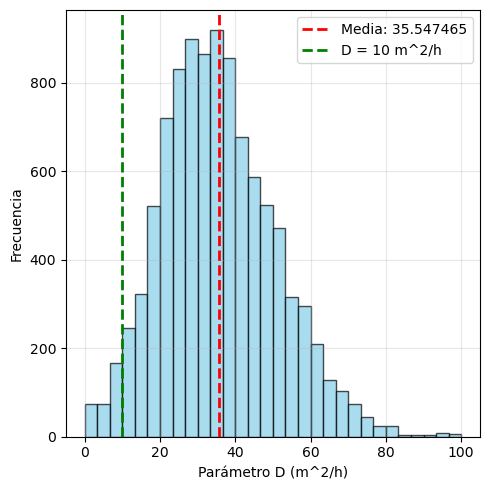

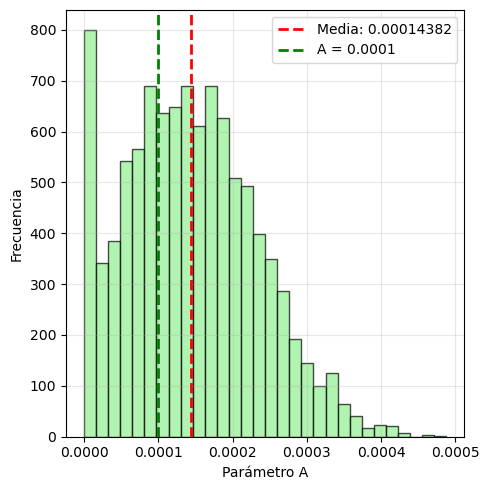

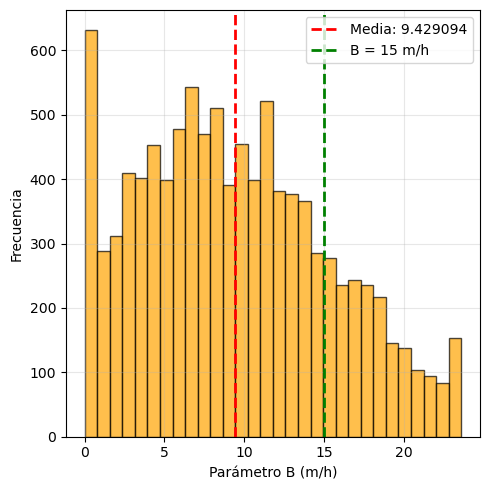

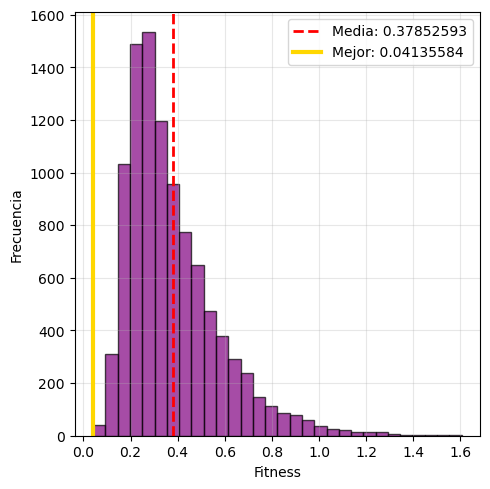

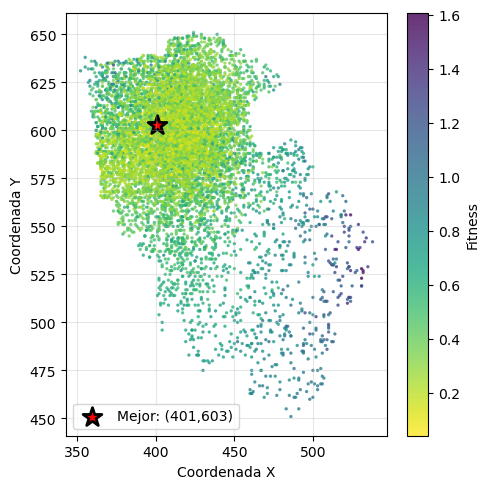

In [7]:
# Visualizaciones específicas para la ÚLTIMA GENERACIÓN

# Detectar automáticamente la última generación
ultima_generacion = df_total['generacion'].max()
gen_ultima = df_total[df_total['generacion'] == ultima_generacion].copy()

n_bins = 30

# Seleccionar los mejores 1000 individuos de la última generación (fitness más pequeño)
# gen_ultima = gen_ultima.nsmallest(100, 'fitness')

# 1. Distribución del parámetro D en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['D'], bins=n_bins, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['D'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["D"].mean():.6f}')
plt.axvline(10, color='green', linestyle='--', linewidth=2,
                  label=f'D = {10} m^2/h')
ax.set_xlabel('Parámetro D (m^2/h)')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_D_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 2. Distribución del parámetro A en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['A'], bins=n_bins, color='lightgreen', alpha=0.7, edgecolor='black')
ticks = np.linspace(gen_ultima['A'].min(), gen_ultima['A'].max(), 6)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
plt.axvline(gen_ultima['A'].mean(), color='red', linestyle='--', linewidth=2,
                         label=f'Media: {gen_ultima["A"].mean():.8f}')
plt.axvline(1e-4, color='green', linestyle='--', linewidth=2,
                         label=f'A = {1e-4}')
ax.set_xlabel('Parámetro A')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_A_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 3. Distribución del parámetro B en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['B'], bins=n_bins, color='orange', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['B'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["B"].mean():.6f}')
plt.axvline(15, color='green', linestyle='--', linewidth=2,
                 label=f'B = {15} m/h')
ax.set_xlabel('Parámetro B (m/h)')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_B_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_1'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_1'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_1"].mean():.6f}')
# plt.axvline(0.91, color='green', linestyle='--', linewidth=2,
#                  label=f'β1 = {0.91}')
# ax.set_xlabel('Parámetro β1')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_1_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_2'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_2'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_2"].mean():.6f}')
# plt.axvline(0.72, color='green', linestyle='--', linewidth=2,
#                  label=f'β2 = {0.72}')
# ax.set_xlabel('Parámetro β2')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_2_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_3'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_3'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_3"].mean():.6f}')
# plt.axvline(1.38, color='green', linestyle='--', linewidth=2,
#                  label=f'β3 = {1.38}')
# ax.set_xlabel('Parámetro β3')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_3_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_4'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_4'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_4"].mean():.6f}')
# plt.axvline(1.94, color='green', linestyle='--', linewidth=2,
#                  label=f'β4 = {1.94}')
# ax.set_xlabel('Parámetro β4')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_4_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_5'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_5'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_5"].mean():.6f}')
# plt.axvline(0.75, color='green', linestyle='--', linewidth=2,
#                  label=f'β5 = {0.75}')
# ax.set_xlabel('Parámetro β5')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_5_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_1'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_1'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_1"].mean():.6f}')
# plt.axvline(0.5, color='green', linestyle='--', linewidth=2,
#                  label=f'γ1 = {0.5}')
# ax.set_xlabel('Parámetro γ1')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_1_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_2'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_2'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_2"].mean():.6f}')
# plt.axvline(0.38, color='green', linestyle='--', linewidth=2,
#                  label=f'γ2 = {0.38}')
# ax.set_xlabel('Parámetro γ2')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_2_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_3'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_3'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_3"].mean():.6f}')
# plt.axvline(0.84, color='green', linestyle='--', linewidth=2,
#                  label=f'γ3 = {0.84}')
# ax.set_xlabel('Parámetro γ3')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_3_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_4'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_4'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_4"].mean():.6f}')
# plt.axvline(0.45, color='green', linestyle='--', linewidth=2,
#                  label=f'γ4 = {0.45}')
# ax.set_xlabel('Parámetro γ4')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_4_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_5'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_5'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_5"].mean():.6f}')
# plt.axvline(0.14, color='green', linestyle='--', linewidth=2,
#                  label=f'γ5 = {0.14}')
# ax.set_xlabel('Parámetro γ5')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_5_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 4. Distribución del fitness en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['fitness'], bins=n_bins, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['fitness'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["fitness"].mean():.8f}')
plt.axvline(gen_ultima['fitness'].min(), color='gold', linestyle='-', linewidth=3,
                 label=f'Mejor: {gen_ultima["fitness"].min():.8f}')
ax.set_xlabel('Fitness')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_fitness_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 5. Puntos de ignición coloreados por fitness (última generación)
fig, ax = plt.subplots(figsize=(5,5))
scatter = ax.scatter(gen_ultima['x'], gen_ultima['y'], 
                          c=gen_ultima['fitness'], s=5, cmap='viridis_r', 
                          alpha=0.8, linewidths=0.1)
# Destacar el mejor individuo
mejor_gen_ultima = gen_ultima.loc[gen_ultima['fitness'].idxmin()]
plt.scatter(mejor_gen_ultima['x'], mejor_gen_ultima['y'], 
                 c='red', s=200, marker='*', edgecolors='black', linewidth=2,
                 label=f'Mejor: ({mejor_gen_ultima["x"]:.0f},{mejor_gen_ultima["y"]:.0f})')
ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax, label='Fitness')
plt.tight_layout()
plt.savefig(f'distribucion_puntos_ignicion_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')